In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from math import pi

pokemon = pd.read_csv("Pokemon.csv")
#                       , index_col = "#")

In [101]:
pokemon.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
# Removes Legendary Pokemon from data
pokemon = pokemon.drop(pokemon[pokemon.Legendary == 1].index)
# Removes Legendary column since it is no longer needed
pokemon = pokemon.drop(["Legendary"], axis = 1)
# Removes Mega Evoled Pokemon from data
pokemon = pokemon.drop_duplicates(subset = "#", keep = "first")
#Sets Pokemon ID number as index
pokemon = pokemon.set_index("#")
pokemon.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1


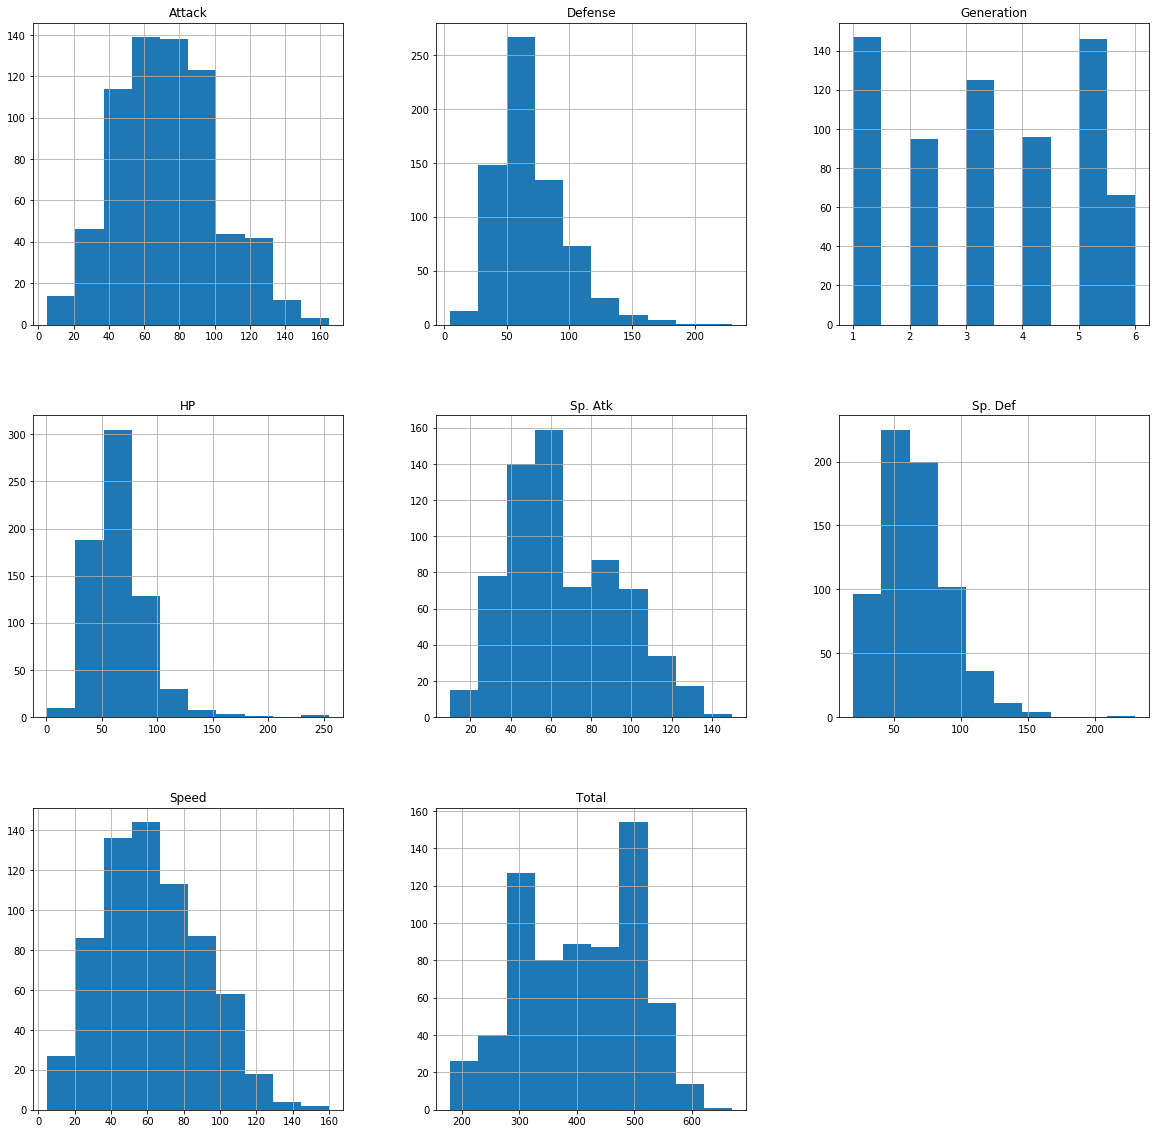

In [103]:
# pokemon.Legendary.replace({True:1,False:0},inplace=True)
# print(pokemon.to_string())

# Shows overall stats of every Pokemon(Gen 1 - Gen 6)
p = pokemon.hist(figsize = (20,20))

In [129]:
# print(pokemon["Legendary"].value_counts())
# print()
print(pokemon["Type 1"].value_counts())
print()
print(pokemon["Type 2"].value_counts())

Water       102
Normal       91
Grass        64
Bug          63
Fire         42
Psychic      39
Rock         38
Electric     33
Poison       28
Ground       28
Dark         26
Fighting     25
Ghost        22
Ice          21
Steel        18
Dragon       17
Fairy        16
Flying        2
Name: Type 1, dtype: int64

Flying      78
Poison      31
Ground      29
Psychic     24
Grass       18
Steel       18
Fairy       17
Dark        16
Fighting    16
Rock        14
Water       12
Ghost       11
Dragon      11
Ice          9
Fire         7
Electric     5
Normal       4
Bug          3
Name: Type 2, dtype: int64


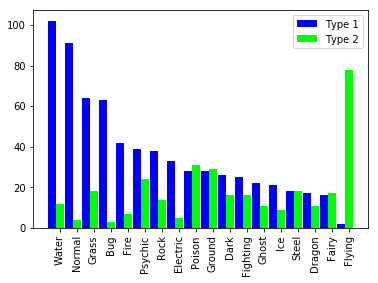

In [3]:
# Plot data
Type1 = [pokemon['Type 1'].value_counts()[key] for key in pokemon['Type 1'].value_counts().index]
Type2 = [pokemon['Type 2'].value_counts()[key] for key in pokemon['Type 1'].value_counts().index]

# Create plot
index = np.arange(len(pokemon['Type 1'].value_counts().index))
bar_width = .45

plt.pyplot.bar(index, Type1, bar_width, color = 'b', label = 'Type 1')
plt.pyplot.bar(index + bar_width, Type2, bar_width, color = '#00FF00', label = 'Type 2')

plt.pyplot.gca().set_xticklabels(pokemon['Type 1'].value_counts().index)
plt.pyplot.gca().set_xticks(index + bar_width)

plt.pyplot.xticks(rotation=90)
plt.pyplot.legend()
plt.pyplot.show()

In [213]:
# Generation 1
Gen1 = pokemon.drop(pokemon[pokemon.Generation != 1].index)

In [214]:
# Droping unwanted columns
Gen1_T1stats = Gen1.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 1 Pokemon:",len(Gen1_T1stats)))
# Average stats for Generation 1 Pokemon based on type 1
Gen1_T1stats = Gen1_T1stats.groupby("Type 1").mean()
Gen1_T1stats = Gen1_T1stats.round(2)
Gen1_T1stats = Gen1_T1stats.reset_index()
print(Gen1_T1stats.to_string())

Number of Gen 1 Pokemon: 147
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bug  55.42   63.75    57.08    47.50    55.42  57.08
1     Dragon  64.33   94.00    68.33    73.33    73.33  66.67
2   Electric  50.00   58.50    62.12    86.88    71.25  98.75
3      Fairy  82.50   57.50    60.50    77.50    77.50  47.50
4   Fighting  63.57  102.86    61.00    45.00    73.57  66.14
5       Fire  61.45   82.45    60.09    80.91    75.91  83.45
6      Ghost  45.00   50.00    45.00   115.00    55.00  95.00
7      Grass  65.00   70.67    69.58    87.92    64.17  52.08
8     Ground  58.12   81.88    86.25    39.38    50.62  58.12
9        Ice  65.00   50.00    35.00   115.00    95.00  95.00
10    Normal  78.68   67.73    53.55    51.27    59.86  69.32
11    Poison  64.50   74.43    67.00    57.14    61.64  58.79
12   Psychic  57.86   53.00    52.86    96.57    92.14  87.71
13      Rock  53.89   82.22   110.00    60.56    55.56  58.33
14     Water  64.54   70.25    77.50    6

In [215]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen1_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot

    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen1_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

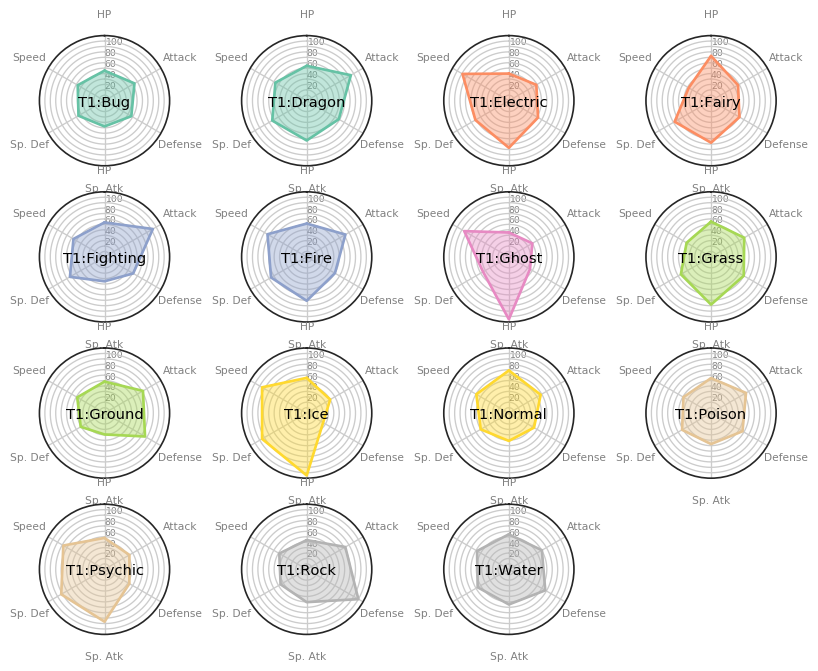

In [216]:
my_dpi=96
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen1_T1stats.index))

for row in range(0, len(Gen1_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen1_T1stats['Type 1'][row], color=my_palette(row))

In [217]:
# Generation 2
Gen2 = pokemon.drop(pokemon[pokemon.Generation != 2].index)

In [218]:
# Droping unwanted columns
Gen2_T1stats = Gen2.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 2 Pokemon:",len(Gen2_T1stats)))
# Average stats for Generation 2 Pokemon based on type 1
Gen2_T1stats = Gen2_T1stats.groupby("Type 1").mean()
Gen2_T1stats = Gen2_T1stats.round(2)
Gen2_T1stats = Gen2_T1stats.reset_index()
print(Gen2_T1stats.to_string())

Number of Gen 2 Pokemon: 95
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def   Speed
0        Bug  56.50   69.00    87.00    47.00    83.50   51.50
1       Dark  66.00   79.00    57.40    74.00    75.40   86.20
2   Electric  56.00   54.60    46.40    72.00    57.00   58.00
3      Fairy  58.00   57.00    60.60    53.00    65.00   30.00
4   Fighting  42.50   65.00    65.00    35.00    72.50   52.50
5       Fire  51.67   60.83    62.67    78.17    62.50   63.00
6      Ghost  60.00   60.00    60.00    85.00    85.00   85.00
7      Grass  58.89   57.00    65.00    61.67    75.00   59.44
8     Ground  81.67   85.00    95.00    45.00    55.00   58.33
9        Ice  60.00   58.75    45.00    60.00    50.00   60.00
10    Normal  87.20   63.13    54.00    58.47    66.13   62.00
11    Poison  85.00   90.00    80.00    70.00    80.00  130.00
12   Psychic  84.67   65.83    63.50    83.33    69.33   76.00
13      Rock  72.50   95.50    86.25    58.75    71.25   45.75
14     Steel  70.00   82.50

In [219]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen2_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot
    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen2_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

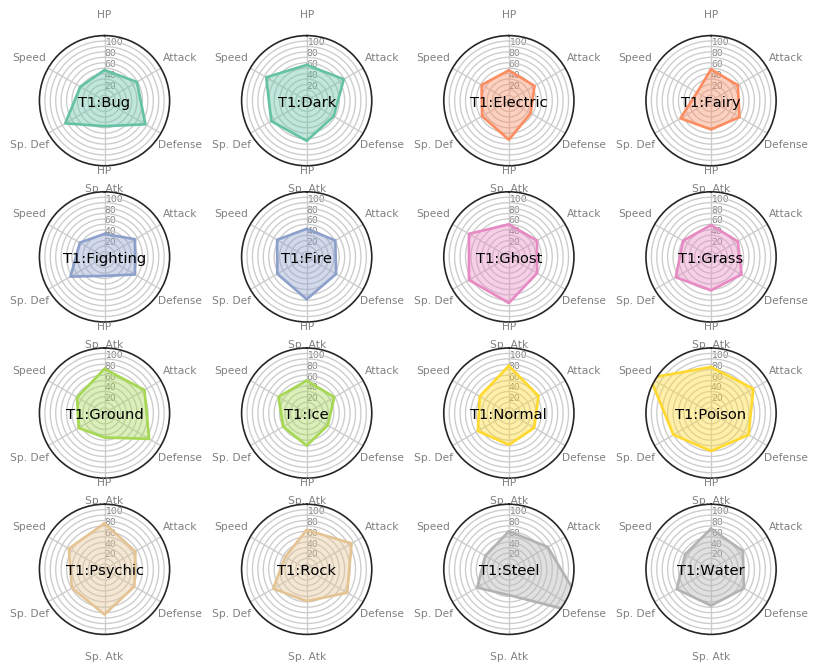

In [220]:
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen2_T1stats.index))

for row in range(0, len(Gen2_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen2_T1stats['Type 1'][row], color=my_palette(row))

In [229]:
# Generation 3
Gen3 = pokemon.drop(pokemon[pokemon.Generation != 3].index)

In [230]:
# Droping unwanted columns
Gen3_T1stats = Gen3.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 3 Pokemon:",len(Gen3_T1stats)))
# Average stats for Generation 3 Pokemon based on type 1
Gen3_T1stats = Gen3_T1stats.groupby("Type 1").mean()
Gen3_T1stats = Gen3_T1stats.round(2)
Gen3_T1stats = Gen3_T1stats.reset_index()
print(Gen3_T1stats.to_string())

Number of Gen 3 Pokemon: 125
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bug  49.83   55.83    54.08    48.33    51.17  59.58
1       Dark  55.00   87.50    60.00    57.50    53.75  57.50
2     Dragon  70.00   93.75    82.50    70.00    66.25  70.00
3   Electric  57.50   52.50    47.50    82.50    65.00  90.00
4   Fighting  76.50   70.00    55.00    40.00    55.00  53.75
5       Fire  64.17   85.00    70.00    86.67    61.67  45.83
6      Ghost  42.00   75.00    80.00    59.00    79.00  40.00
7      Grass  62.42   75.25    55.25    75.58    60.17  63.83
8     Ground  55.00   76.00    67.00    57.00    73.00  62.00
9        Ice  80.00   62.00    68.00    71.00    68.00  53.00
10    Normal  68.67   69.89    57.28    53.22    55.06  65.78
11    Poison  81.00   72.00    65.33    72.00    65.33  53.33
12   Psychic  62.00   38.29    49.00    73.29    74.71  56.86
13      Rock  63.14   76.71    87.00    63.86    80.57  50.86
14     Steel  58.57   88.57   116.43    5

In [231]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen3_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot
    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen3_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

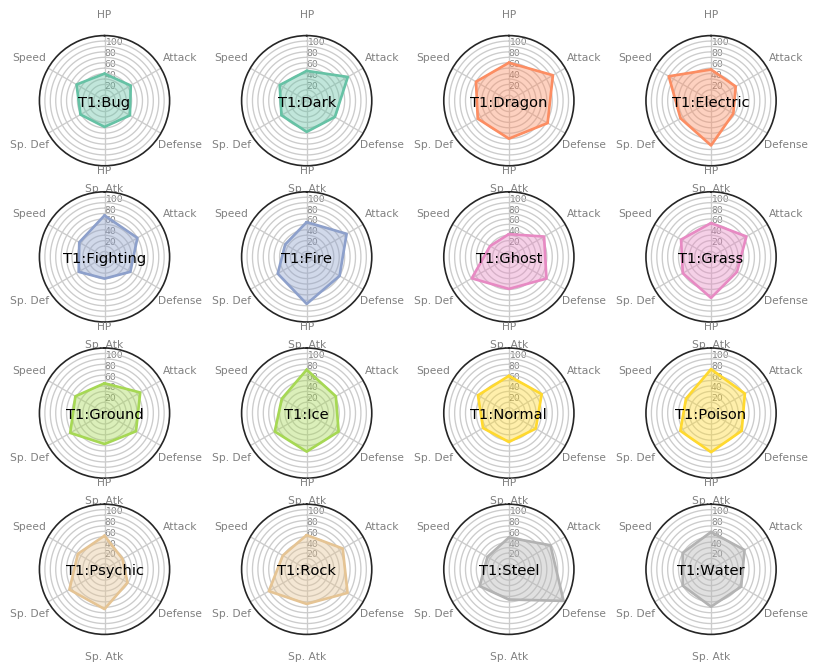

In [232]:
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen3_T1stats.index))

for row in range(0, len(Gen3_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen3_T1stats['Type 1'][row], color=my_palette(row))

In [233]:
# Generation 4
Gen4 = pokemon.drop(pokemon[pokemon.Generation != 4].index)

In [234]:
# Droping unwanted columns
Gen4_T1stats = Gen4.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 4 Pokemon:",len(Gen4_T1stats)))
# Average stats for Generation 4 Pokemon based on type 1
Gen4_T1stats = Gen4_T1stats.groupby("Type 1").mean()
Gen4_T1stats = Gen4_T1stats.round(2)
Gen4_T1stats = Gen4_T1stats.reset_index()
print(Gen4_T1stats.to_string())

Number of Gen 4 Pokemon: 96
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bug  58.75   59.75    62.75    63.50    61.50  54.12
1       Dark  85.00  122.50    58.50    75.00    68.50  98.00
2     Dragon  78.00   96.67    68.33    56.67    61.67  75.33
3   Electric  62.86   79.71    70.14    80.00    72.00  73.71
4      Fairy  85.00   50.00    95.00   120.00   115.00  80.00
5   Fighting  55.00   90.00    55.00    75.00    55.00  75.00
6       Fire  64.75   83.75    58.50    91.25    65.50  83.25
7      Ghost  79.00   76.40    76.20    82.40    89.20  67.00
8      Grass  69.08   77.08    76.75    76.08    70.25  56.58
9     Ground  91.50  104.75   112.75    51.50    61.00  53.50
10       Ice  81.67   90.00    86.67    93.33    75.00  85.00
11    Normal  75.93   71.93    53.67    55.73    60.40  74.00
12    Poison  67.83   77.17    69.83    58.17    56.17  75.50
13   Psychic  63.25   62.50    70.00    68.75    96.25  67.50
14      Rock  60.67   86.50   104.33    44

In [235]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen4_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot
    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen4_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

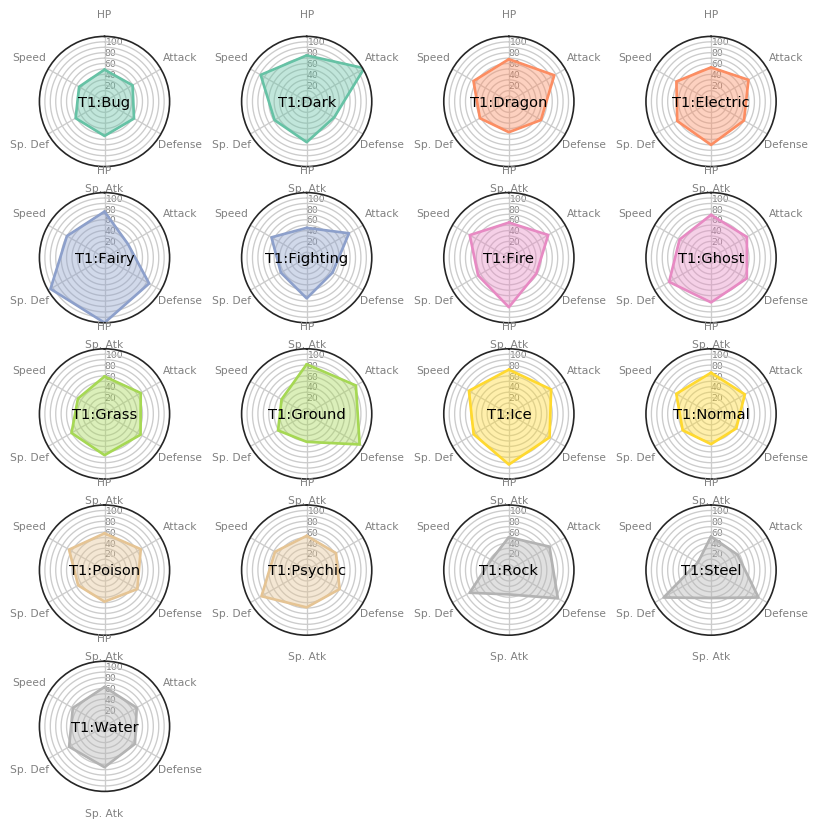

In [236]:
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen4_T1stats.index))

for row in range(0, len(Gen4_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen4_T1stats['Type 1'][row], color=my_palette(row))

In [237]:
# Generation 5
Gen5 = pokemon.drop(pokemon[pokemon.Generation != 5].index)

In [238]:
# Droping unwanted columns
Gen5_T1stats = Gen5.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 5 Pokemon:",len(Gen5_T1stats)))
# Average stats for Generation 5 Pokemon based on type 1
Gen5_T1stats = Gen5_T1stats.groupby("Type 1").mean()
Gen5_T1stats = Gen5_T1stats.round(2)
Gen5_T1stats = Gen5_T1stats.reset_index()
print(Gen5_T1stats.to_string())

Number of Gen 5 Pokemon: 146
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bug  59.11   77.61    78.28    62.89    66.94  71.28
1       Dark  63.54   81.38    71.69    65.62    65.54  70.15
2     Dragon  66.25  117.75    77.50    47.50    62.50  67.25
3   Electric  60.00   81.67    57.50    71.67    57.50  74.17
4   Fighting  81.43  108.57    72.14    47.14    60.00  60.00
5       Fire  81.25   94.62    55.25    64.50    55.25  67.50
6      Ghost  53.20   41.00    87.00    91.00    75.00  43.00
7      Grass  64.00   63.57    72.14    67.79    70.71  61.50
8     Ground  79.00   94.38    59.25    49.50    61.12  63.62
9        Ice  63.00   73.33    58.33    80.00    80.83  62.83
10    Normal  72.35   82.06    64.88    51.65    64.06  71.18
11    Poison  65.00   72.50    72.00    50.00    72.00  70.00
12   Psychic  70.08   48.85    62.92    92.23    71.77  50.08
13      Rock  68.00  113.40    86.00    64.20    51.00  48.00
14     Steel  53.33   78.33    93.33    6

In [239]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen5_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot
    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen5_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

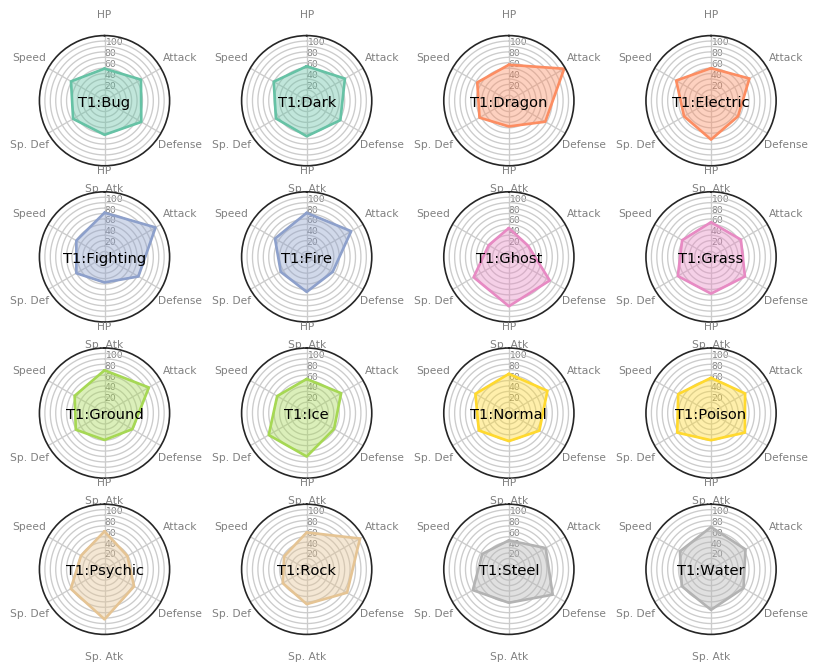

In [240]:
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen5_T1stats.index))

for row in range(0, len(Gen5_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen5_T1stats['Type 1'][row], color=my_palette(row))

In [241]:
# Generation 6
Gen6 = pokemon.drop(pokemon[pokemon.Generation != 6].index)

In [242]:
# Droping unwanted columns
Gen6_T1stats = Gen6.drop(["Name", "Total", "Generation"], axis = 1)
# Pokemon count for that Generation
print("{} {}".format("Number of Gen 6 Pokemon:",len(Gen6_T1stats)))
# Average stats for Generation 6 Pokemon based on type 1
Gen6_T1stats = Gen6_T1stats.groupby("Type 1").mean()
Gen6_T1stats = Gen6_T1stats.round(2)
Gen6_T1stats = Gen6_T1stats.reset_index()
print(Gen6_T1stats.to_string())

Number of Gen 6 Pokemon: 66
      Type 1     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bug  54.33   36.33    50.00    48.00    35.00  51.00
1       Dark  69.50   73.00    70.50    52.50    60.50  59.00
2     Dragon  67.67   75.00    52.67    82.67   112.67  60.00
3   Electric  57.67   50.33    47.33    83.67    68.00  93.33
4      Fairy  74.25   58.12    62.88    83.00    93.38  50.25
5   Fighting  80.00   99.33    71.67    63.00    60.67  73.00
6       Fire  66.00   63.57    60.86    82.57    67.29  89.29
7     Flying  62.50   50.00    57.50    71.00    60.00  89.00
8      Ghost  60.50   84.00    79.00    54.25    68.00  57.25
9      Grass  78.80   82.20    78.40    67.40    63.20  55.80
10       Ice  75.00   93.00   134.50    38.00    40.50  28.00
11    Normal  60.75   55.50    54.50    46.75    60.25  74.75
12    Poison  57.50   67.50    75.00    78.50    91.50  37.00
13   Psychic  68.00   48.00    65.00    73.00    70.50  86.00
14      Rock  72.00   79.00    92.86    60

In [243]:
def stat_radar(row, title, color):
#   Variable number
    categories = list(Gen6_T1stats)[1:]
    N = len(categories)
    
#   Space out each axis in plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
#   Initialize plot
    ax = plt.pyplot.subplot(5, 4, row + 1, polar = True)
    
#   Axis on goes on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.pyplot.xticks(angles[:-1], categories, color='grey', size=8)
    
    ax.set_rlabel_position(0)
    plt.pyplot.yticks([10,20,30,40,50,60,70,80,90,100,110]
                      , ["","20","","40","","60","","80","","100",""]
                      , color="grey", size=7)
    plt.pyplot.ylim(0,120)
    
    values=Gen6_T1stats.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.pyplot.title(title, size=11, color='black', y=0.4)

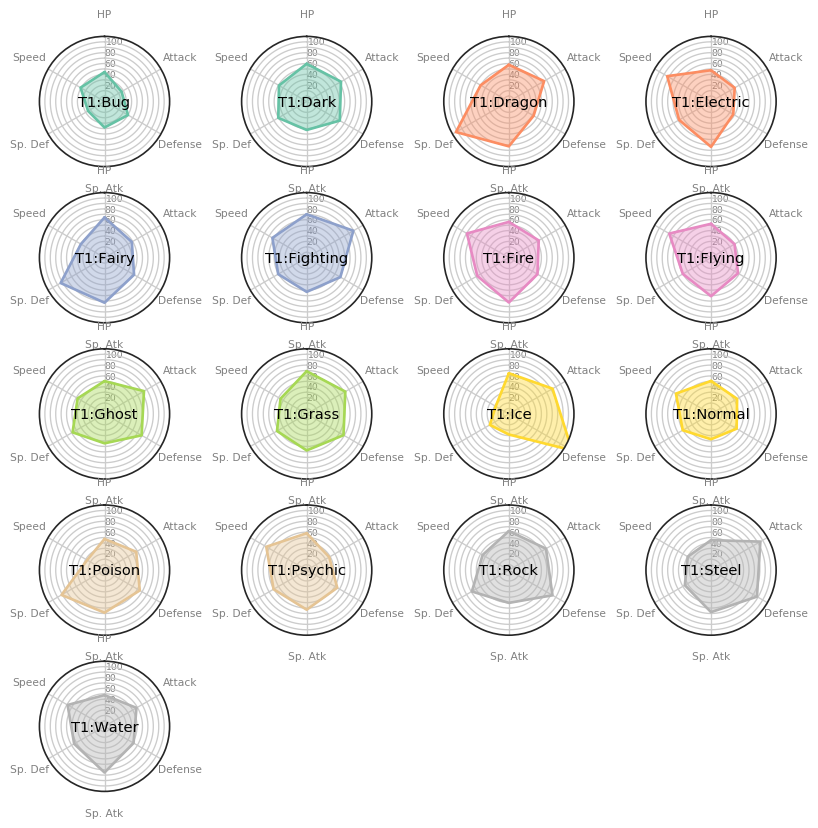

In [244]:
plt.pyplot.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.pyplot.cm.get_cmap("Set2", len(Gen6_T1stats.index))

for row in range(0, len(Gen6_T1stats.index)):
    stat_radar(row=row, title='T1:'+Gen6_T1stats['Type 1'][row], color=my_palette(row))

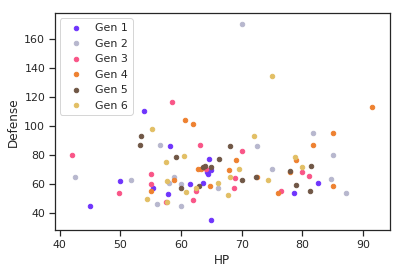

In [210]:
ax1 = Gen1_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#6F35FC", label = 'Gen 1')
ax2 = Gen2_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#B7B7CE", label = 'Gen 2', ax =ax1)
ax3 = Gen3_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#F95587", label = 'Gen 3', ax =ax1)
ax4 = Gen4_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#EE8130", label = 'Gen 4', ax =ax1)
ax5 = Gen5_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#705746", label = 'Gen 5', ax =ax1)
ax6 = Gen6_T1stats.plot.scatter(x = 'HP', y = 'Defense', color = "#E2BF65", label = 'Gen 6', ax =ax1)


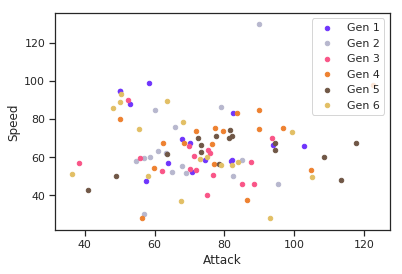

In [211]:
ax1 = Gen1_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#6F35FC", label = 'Gen 1')
ax2 = Gen2_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#B7B7CE", label = 'Gen 2', ax =ax1)
ax3 = Gen3_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#F95587", label = 'Gen 3', ax =ax1)
ax4 = Gen4_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#EE8130", label = 'Gen 4', ax =ax1)
ax5 = Gen5_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#705746", label = 'Gen 5', ax =ax1)
ax6 = Gen6_T1stats.plot.scatter(x = 'Attack', y = 'Speed', color = "#E2BF65", label = 'Gen 6', ax =ax1)

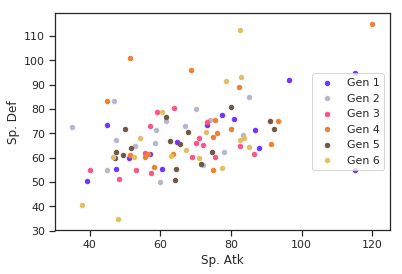

In [212]:
ax1 = Gen1_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#6F35FC", label = 'Gen 1')
ax2 = Gen2_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#B7B7CE", label = 'Gen 2', ax =ax1)
ax3 = Gen3_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#F95587", label = 'Gen 3', ax =ax1)
ax4 = Gen4_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#EE8130", label = 'Gen 4', ax =ax1)
ax5 = Gen5_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#705746", label = 'Gen 5', ax =ax1)
ax6 = Gen6_T1stats.plot.scatter(x = 'Sp. Atk', y = 'Sp. Def', color = "#E2BF65", label = 'Gen 6', ax =ax1)